# Approximation de fonctions

Objectifs :
<br>
    - Implémentation de la méthode d'approximation linéaire par morceaux
        <br>
    - Interpolation polynomiale de Lagrange, algorithme des différences divisées
    <br>
    - Illustration du phénomène d'instabilité de Runge.

## Interpolation linéaire par morceaux

### L'algorithme

En connaissant les valeurs $f(x^s_i)$ et $f(x^s_{i+1})$ d'une fonction $f$ aux extrémités d'un intervalle $[x^s_i,x^s_{i+1}]$, l'approximation linéaire consiste à approcher la fonction $f$ en tout point $x$ de $[x^s_i,x^s_{i+1}]$ par la fonction affine valant $f(x^s_i)$ en $x^s_i$ et $f(x^s_{i+1})$ en $x^s_{i+1}$:
$$
f(x^s_i)+(x-x^s_i)\frac{f(x^s_{i+1})-f(x^s_i)}{x^s_{i+1}-x^s_i}.
$$
Si l'on se donne $x^{s}=(x_{0}^{s},...,x_{m-1}^{s})$ avec $x_{0}^{s}<...<x_{m-1}^{s}$ un sample de valeurs de $x$, et  $y^{s}=(y_{0}^{s},...,y_{m-1}^{s})$ les valeurs $y_{i}^{s}=f(x^{s}_i)$ en ces points de $f$, l'interpolation linéaire par morceaux consiste à effectuer une approximation linéaire sur chaque intervalle $[x_i^{s},x_{i+1}^{s}]$.<br>

__Exercice 1__

__1.__
Pour $x=(x_0,...,x_{n-1})$ des points tels que $x_0^{s}\leq x_0<...<x_{n-1}\leq x^{s}_{m-1}$, écrire une fonction`linpm(x,xs,ys)` qui renvoie la suite des valeurs $y=(y_0,...,y_{n-1})$ où $y_i$ correspond à la valeur en $x_i$ de l'approximation linéaire par morceaux de $f$.

__2.__ Illustrer votre fonction `linpm` en représentant les courbes sur l'intervalle $[-1,1]$ de la fonction $f(x)=\cos(x)$, ainsi que de son approximation linéaire par morceaux associée aux points $(x_0^s,x_1^s,x_2^s,x_3^s)=(-1,0,0.5,1)$.

### La routine de `numpy`

La fonction `numpy.interp` permet d'effectuer directement cette interpolation linéaire par morceaux. Par défaut, elle étend la fonction par la valeur $y^{s}_0$ pour $x<x_0$, et $y^{s}_{m-1}$ pour $x>x_{m-1}$.

On illustre ci-dessous son utilisation pour la fonction $f(x)=\sin(x)$, pour le sample de points $(x_0^s,x_1^s,x_2^s,x_3^s,x_4^s)=(0,\frac{\pi}{2},\pi,\frac{3\pi}{2},2\pi)$.

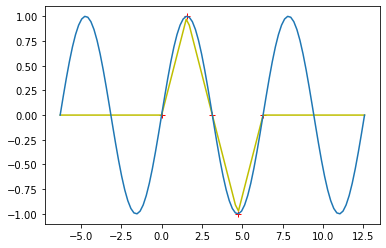

In [6]:
import numpy as np
from matplotlib import pyplot as plt

xs1 = np.linspace(0, 2*np.pi, 5)
ys1 = np.sin(xs1)

x1 = np.linspace(-2*np.pi, 4*np.pi, 100)

y1 = np.interp(x1, xs1, ys1) #interpolation linéaire
y2 = np.sin(x1) #représentation graphique de la fonction f

plt.plot(xs1, ys1, "r+")
plt.plot(x1, y1, "y")
plt.plot(x1, y2)

## Interpolation de Lagrange


On cherche à approximer une fonction $f$ par un polynôme $p$. Étant donnés un sample de $m$ points $x_0^s$,...,$x_{m-1}^s$ le polynôme d'interpolation de Lagrange est l'unique polynôme $p$ de degré $m-1$ qui prend les mêmes valeurs que $f$ en ces points :
$$
(1)\qquad p(x_i^s)=f(x_i^s) \qquad \mbox{pour }i=0,...,m-1.
$$

### Un premier algorithme pour le calcul du polynome d'interpolation

Nous présentons un premier algorithme pour déterminer le polynôme $p$. Un autre algorithme avec un temps d'exécution plus rapide, basé sur les différences divisées, figure plus loin en exercice. Nous cherchons $p$ sous la forme
$$
(2) \qquad p(x)=a_0+a_1(x-x_0^s)+a_2(x-x_1^s)(x-x_0^s)+...+a_{m-1}(x-x_{m-2}^s)...(x-x_1^s)(x-x_0^s)
$$
où les coefficients $a_0$,...,$a_{m-1}\in \mathbb R^m$ sont à déterminer.

Tout d'abord, en supposant $a_0$,...,$a_{m-1}\in \mathbb R$ connus, nous allons écrire un algorithme pour évaluer $p$ en un point $x$. Pour $a=(a_0,...,a_{m-1})$ et $x^s=(x^s_0,...,x^s_{m-2})$ et $x\in \mathbb R$, la fonction `eval_poly_lagr(a,xs,x)` ci-dessous retourne la valeur de $(2)$.

In [6]:
def eval_poly_lagr(a,xs,x):
    m=len(a)
    y=np.ones([m])
    for i in range(1,m):
        y[i]=(x-xs[i-1])*y[i-1]    #Calcule le vecteur (1,(x-xs[0]),(x-xs[1])(x-xs[0]),...)
    y=a*y    #Calcule le vecteur (a[0],a[1](x-xs[0]),a[2](x-xs[1])(x-xs[0]),...)
    return(np.sum(y))

On teste `polylag(a,xs,x)` sur des exemples. On vérifie ci dessous que pour $a=[1]$ et $xs=[]$ cela retourne la fonction constante égale à $1$ et que pour $a=[0,0,1]$ et $xs=[0,1]$ cela renvoie le polynome $x(x-1)$.

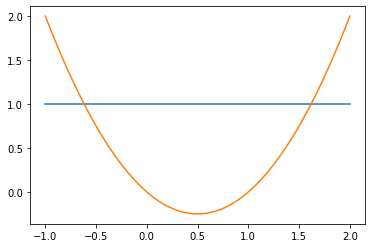

In [8]:
x2=np.linspace(-1,2,100)
a21=np.array([1])
xs21=np.empty(0)
y21=np.array([eval_poly_lagr(a21,xs21,x2[i]) for i in range(100)])
plt.plot(x2,y21)
a22=np.array([0,0,1])
xs22=np.array([0,1])
y22=np.array([eval_poly_lagr(a22,xs22,x2[i]) for i in range(100)])
plt.plot(x2,y22)

Revenons maintenant au problème de déterminer $p$, et donc de trouver les coefficients $a_0$,...,$a_{m-1}$. On remarque que si l'on connait les valeurs de $a_0$, ... , $a_{i-1}$ alors on peut déterminer la valeur de $a_i$. En effet, par $(1)$ et $(2)$ on a
$$
a_0+a_1(x^s_{i}-x_0^s)+...+a_{i-1}\Pi_{j=0}^{i-2}(x^s_i-x^s_{j})+a_{i}\Pi_{j=0}^{i-1}(x^s_i-x^s_{j})=f(x^s_i)
$$
de sorte que
$$
(3)\qquad a_i=\frac{f(x^s_i)-\left(a_0+a_1(x^s_i-x_0^s)+...+a_{i-1}\Pi_{j=0}^{i-2}(x^s_i-x^s_{j})\right)}{\Pi_{j=0}^{i-1}(x^s_i-x^s_{j})}.
$$
On reconnait que ci-dessus, $a_0+a_1(x^s_i-x_0^s)+...+a_{i-1}\Pi_{j=0}^{i-2}(x^s_i-x^s_{j})$ n'est autre que le polynome d'interpolation de Lagrange de $f$ pour les points $(x^s_0,...x^s_{i-1})$ évalué en $x_i$. Pour $y^s=(f(x_0^s),...,f(x^s_{m-1}))$, la fonction `coef_lagrange(xs,ys)` ci-dessous calcule itérativement les valeurs des coefficients $a_0$, ..., $a_{m-1}$ avec la formule $(3)$ :

In [9]:
def coef_lagrange(xs,ys):
    m=len(xs)
    a=np.zeros(m)
    a[0]=ys[0]
    for i in range(1,m):
        prod=1
        for j in range(i):           # calcule (x[i]-x[i-1])*...*(x[i]-x[0])
            prod=prod*(xs[i]-xs[j])    
        a[i]=(ys[i]-eval_poly_lagr(a[0:i],xs[0:i],xs[i]))/prod
    return(a)

Pour illustrer cette fonction, on représente graphiquement ci-dessous la fonction $x\mapsto \cos(x)$ et son  polynome de Lagrange en les points $\{-2,0,2\}$.

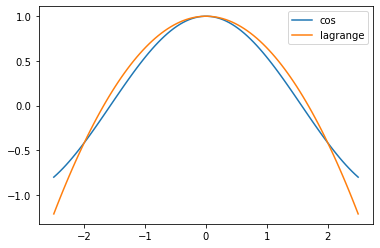

In [19]:
xs2=np.linspace(-2,2,3)
ys2=np.array([np.cos(xs2[i]) for i in range(3)])
x2=np.linspace(-2.5,2.5,100)
y2=np.array([np.cos(x2[i]) for i in range(100)])
a2=coef_lagrange(xs2,ys2)
ylagr2=np.array([eval_poly_lagr(a2,xs2,x2[i]) for i in range(100)])
plt.plot(x2,y2,label="cos")
plt.plot(x2,ylagr2,label="lagrange")
plt.legend()

### Utilisation de routines avec numpy et scipy

Le module `numpy.polynomial` permet de travailler avec des polynomes :

In [13]:
import numpy.polynomial as np_poly
p=np_poly.Polynomial([1,2,3])   #un exemple de polynome 1+2x+3x^2
p

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

On evalue le polynome $p$ par `p(x)`

In [14]:
p(3)

34.0

Le module scipy offre alors une routine qui permet de calculer directement le polynome d'interpolation de Lagrange d'une fonction. Ci-dessous on représente graphiquement la fonction $x\mapsto \exp(x)$ ainsi que son polynome de Lagrange en les points $(0,1,2)$.

In [34]:
import scipy.interpolate as sc_int
xs3 = np.array([0, 1, 2])
ys3 = np.exp(xs3)
plagr3 = sc_int.lagrange(xs3, ys3)
plagr3

poly1d([1.47624622, 0.24203561, 1.        ])

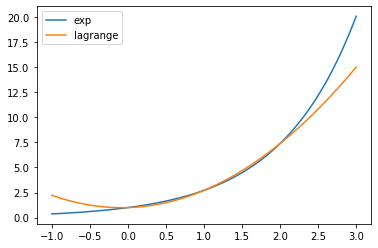

In [35]:
x3=np.linspace(-1,3,100)
y3=np.exp(x3)
y3lagr=plag3(x3)
plt.plot(x3,y3,label="exp")
plt.plot(x3,y3lagr,label="lagrange")
plt.legend()

A noter que `scipy.interpolate.lagrange(x, y)` utilise poly1d, ce qui correspond à une version antérieure à la nouvelle version numpy.polynomial.Polynomial, mais toujours compatible avec numpy.

### Exercices

__Exercice 2 (Algorithme des différences divisées)__

__1.__ 
La rapidité d'exécution de la fonction `coef_lagrange` peut être légèrement améliorée. Pour calculer plus rapidement les coefficients $(a_i)_{0\leq i \leq m-1}$ on a le résultat suivant cf notes de cours :

__Théorème :__ Le polynôme d'interpolation de Lagrange de la fonction $f$ aux points distincts $(x_i)_{0\leq i \leq n}$ est donné par
$$
p(x)=\sum_{i=0}^{m-1} f[x_0^s,...,x_i^s] \Pi_{j=0}^{i-1}(x-x_j^s)
$$
où ci-dessus $f[]$ désigne les différences divisées de $f$ définies par récurrence comme suit : $f[x_i]=f(x_i)$ pour tout $i\in\{0,...,m-1\}$ et
$$
(*) \qquad f[x_0,...,x_k]=\frac{f[x_1,...,x_k]-f[x_0,...,x_{k-1}]}{x_k-x_0}
$$

Coder une fonction `coef_lagrange_diff(xs,ys)` qui calcule les coefficients $(a_0,a_1,...,a_{m-1})=(f[x_0],f[x_0,x_1],...,f[x_0,x_1,...,x_{m-1}])$ en s'appuyant sur la formule des différences divisées $(*)$. Vérifier votre code sur un exemple.

__2.__ Montrer que l'execution de la fonction `coef_lagrange` nécessite $3m^2+O(m)$ opérations (additions, soustractions, multiplications et divisions). (On peut commencer par montrer que celle de `eval_poly_lag` nécessite $4m+O(1)$ opérations)

__3.__ Trouver le code d'une fonction `coef_lagrange_diff` pour la question __1.__ dont l'execution nécessite $\frac{3}{2}m^2+O(m)$ opérations. (l'algorithme des différences divisées permet donc d'améliorer légèrement la vitesse d'execution).

__Exercice 3 (Illustration du phénomène de Runge)__
On considère la fonction
$$
f(x)=\frac{1}{1+25x^2}.
$$
__1.__ Représenter graphiquement la fonction $f$ sur l'intervalle $[-1,1]$

__2.__ Représenter graphiquement le polynome d'interpolation de $f$ pour les points ${-1,0,1}$ sur l'intervalle $[-1,1]$, en vous aidant de `scipy.interpolate.lagrange(x,y)`.

__3.__ Représenter sur un même graphique la fonction $f$, son polynome d'interpolation pour les 7 points $\{-1,-\frac 23,-\frac 13,0,\frac 13,\frac 23,1\}$, et son polynome d'interpolation pour les 11 points $\{-1,-\frac 45,-\frac 35,-\frac 25,-\frac 15,0,\frac 15,\frac 25,\frac 35,\frac 45,1\}$ sur l'intervalle, $[-1,1]$
<br>
<br>
Remarque : Vous venez d'illustrer le fait que la suite de polynomes d'interpolation de Lagrange pour $f$ en les $n+1$ points $\{-1+\frac{2i}{n}\}_{0\leq i \leq n}$, ne converge pas dans $L^\infty([-1,1])$ vers $f$ !! (une démonstration rigoroureuse de ce résultat est possible mais nous l'omettons car trop longue et difficile). Ce phénomène est appelé phénomène de Runge. Ce problème illustre l'instabilité de l'interpolation de Lagrange sur un intervalle, et, en pratique, on procède souvent à une division de l'intervalle de départ un sous-intervalles plus petits, et pour chacun on utilise un interpolation de Lagrange.

On constate empiriquement numériquement avec l'exemple précédent que la série de Fourier de la fonction converge vers la fonction. En effet, on rappelle que la transformation de Fourier est un isométrie de $L^2([0,1])$ vers $\ell^2(\mathbb Z)$ (formule de Parseval). Son inverse est la transformée de Fourier inverse. Dit autrement, si $f\in L^2([0,1])$ et $S_n(x)=\sum_{k=-n}^n c_ke^{i2\pi k x}$, alors $S_n\rightarrow f$ dans $L^2([0,1])$ quand $n\to \infty$. En revanche, $S_n$ peut ne pas converger vers $f$ pour d'autres normes, telle $L^\infty$, comme l'illustre l'exemple suivant.